In [1]:
# Load all the 2023 data
import glob
import pandas as pd

files_2023 = glob.glob("../data/raw/yellow_tripdata_2023*.parquet")

In [2]:
# Load and concatenate all the data into a single data frame:
df_2023 = pd.concat((pd.read_parquet(f) for f in files_2023), ignore_index = True)

In [3]:
df_2023.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


In [4]:
df_2023.shape

(38310226, 20)

In [5]:
# Number of missing values
df_2023.isna().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1309356
trip_distance                   0
RatecodeID                1309356
store_and_fwd_flag        1309356
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1309356
airport_fee              35315203
Airport_fee               4304379
dtype: int64

<Axes: xlabel='pickup_date'>

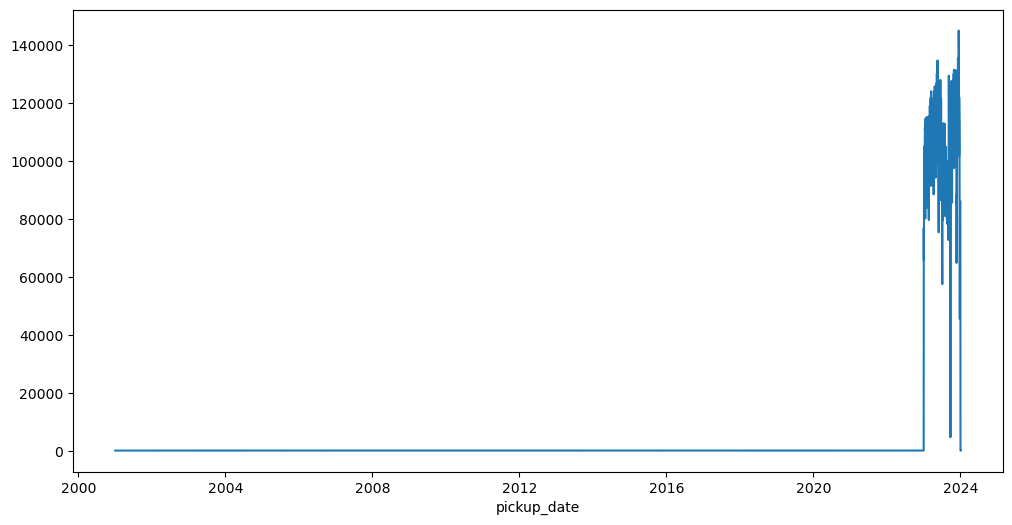

In [6]:
# Daily time series
df_2023['pickup_date'] = df_2023['tpep_pickup_datetime'].dt.date

# Trips per day
daily_counts_2023 = df_2023.groupby('pickup_date').size()

# Plot
daily_counts_2023.plot(figsize = (12,6))

In [7]:
df_2023[df_2023['tpep_pickup_datetime'] < '2023-01-01']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,pickup_date
80,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,1.00,0.5,2.00,0.00,1.0,13.50,2.5,0.0,NaN,2022-12-31
567,2,2022-12-31 23:59:37,2023-01-01 00:07:28,1.0,2.38,1.0,N,142,151,1,...,1.00,0.5,4.28,0.00,1.0,21.38,2.5,0.0,NaN,2022-12-31
761,2,2022-12-31 23:58:27,2023-01-01 00:02:21,1.0,0.49,1.0,N,229,237,1,...,1.00,0.5,0.08,0.00,1.0,10.88,2.5,0.0,NaN,2022-12-31
900,2,2022-12-31 23:44:31,2022-12-31 23:48:47,1.0,0.52,1.0,N,233,162,1,...,1.00,0.5,2.16,0.00,1.0,12.96,2.5,0.0,NaN,2022-12-31
1177,2,2022-12-31 23:59:25,2023-01-01 00:19:21,2.0,3.65,1.0,N,141,68,1,...,1.00,0.5,7.23,0.00,1.0,31.33,2.5,0.0,NaN,2022-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31380349,2,2008-12-31 23:04:45,2009-01-01 14:58:14,1.0,16.66,2.0,N,132,161,1,...,0.00,0.5,0.00,6.94,1.0,82.69,2.5,NaN,1.75,2008-12-31
32935036,2,2009-01-01 00:05:00,2009-01-01 00:13:17,1.0,1.58,1.0,N,236,238,2,...,0.00,0.5,0.00,0.00,1.0,14.00,2.5,NaN,0.00,2009-01-01
36062418,2,2002-12-31 22:16:54,2003-01-01 15:02:08,1.0,3.25,1.0,N,132,10,1,...,1.75,0.5,3.63,0.00,1.0,21.78,0.0,NaN,0.00,2002-12-31
37464864,2,2002-12-31 23:03:18,2003-01-01 21:09:44,1.0,28.19,2.0,N,132,13,1,...,0.00,0.5,16.54,6.94,1.0,99.23,2.5,NaN,1.75,2002-12-31


We notice that some of these rows have likely been included as the pickup is on 2022-12-31 and the drop off is on 2023-01-01.

However the rest appear to be irrelvant garbage values.

For consitency we will only look at taxi trips with a pickup in 2023.

In [8]:
df_2023 = df_2023[df_2023['tpep_pickup_datetime'].dt.year == 2023]

<Axes: xlabel='pickup_date'>

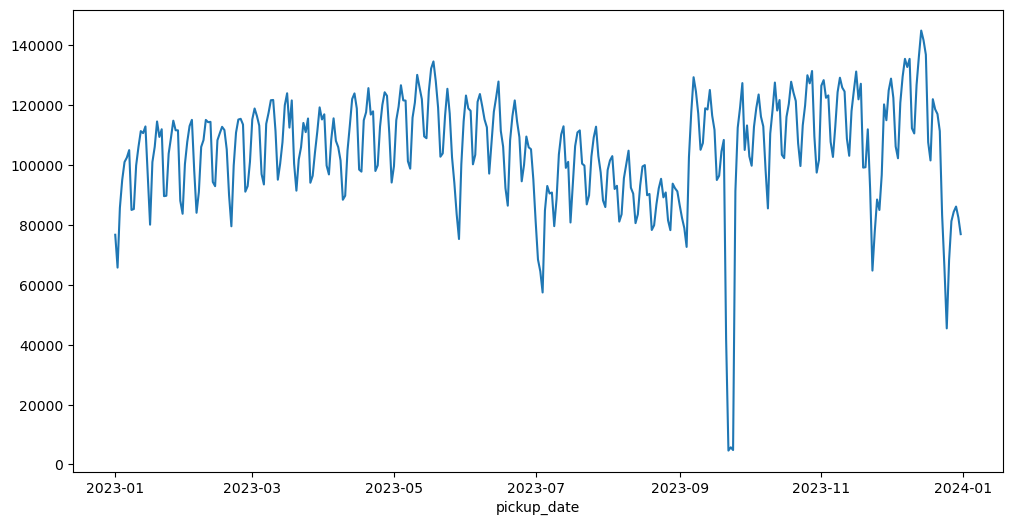

In [9]:
# Daily time series
df_2023['pickup_date'] = df_2023['tpep_pickup_datetime'].dt.date

# Trips per day
daily_counts_2023 = df_2023.groupby('pickup_date').size()

# Plot
daily_counts_2023.plot(figsize = (12,6))

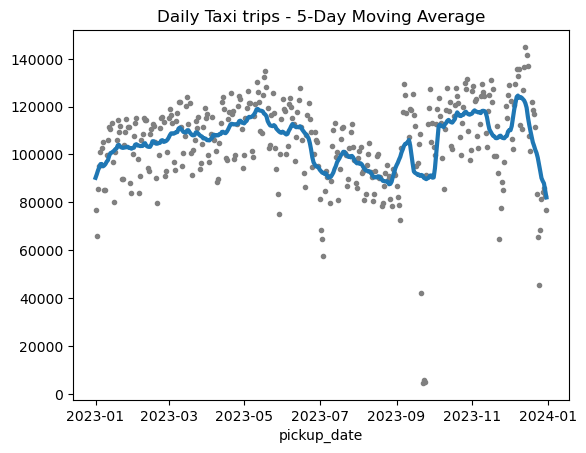

In [10]:
# Create rolling average
moving_average = daily_counts_2023.rolling(
    window = 20,
    center = True,
    min_periods = 5,
).mean()

ax = daily_counts_2023.plot(style = ".", color = "0.5")
moving_average.plot(
    ax = ax, linewidth = 3, title = "Daily Taxi trips - 5-Day Moving Average", legend = False,
);

We now switch to investigating exclusively JFK Airport

In [11]:
df_2023.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,pickup_date
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN,2023-01-01
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN,2023-01-01
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN,2023-01-01
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN,2023-01-01
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN,2023-01-01


In [12]:
df_jfk_2023 = df_2023[df_2023["PULocationID"] == 132].copy() 

In [13]:
df_jfk_2023.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,pickup_date
21,1,2023-01-01 00:13:30,2023-01-01 00:44:00,1.0,17.80,2.0,N,132,116,1,...,1.25,0.5,15.85,6.55,1.0,95.15,0.0,1.25,NaN,2023-01-01
48,2,2023-01-01 00:41:41,2023-01-01 01:19:32,1.0,11.11,1.0,N,132,61,1,...,1.00,0.5,10.31,0.00,1.0,61.86,0.0,1.25,NaN,2023-01-01
59,2,2023-01-01 00:22:39,2023-01-01 01:30:45,1.0,16.02,1.0,N,132,265,2,...,1.00,0.5,0.00,0.00,1.0,64.85,0.0,1.25,NaN,2023-01-01
90,2,2023-01-01 00:37:44,2023-01-01 01:16:14,1.0,11.03,1.0,N,132,188,1,...,1.00,0.5,13.45,0.00,1.0,68.50,0.0,1.25,NaN,2023-01-01
91,2,2023-01-01 00:49:24,2023-01-01 01:30:59,1.0,13.54,1.0,N,132,149,1,...,1.00,0.5,12.86,0.00,1.0,78.41,0.0,1.25,NaN,2023-01-01


In [14]:
df_jfk_2023.shape

(1992276, 21)

In [15]:
# Save this as a .parquet to avoid long reload times in future
df_jfk_2023.to_parquet("../data/interim/processed_jfk.parquet")

# To reload:
# df_jfk_2023 = pd.read_parquet("../data/interim/processed_jfk.parquet")

In [74]:
# Create drop off Choropleth for taxis from JFK
m_3 = make_choropleth(df_jfk_2023, "DOLocationID", taxi_zones_folium, taxi_zone_lookup, "JFK")

# Export to HTML file
m_3.save("../reports/maps/DOLocationID_JFK_count_by_zone.html")


In [16]:
df_jfk_2023.shape

(1992276, 21)

<Axes: xlabel='pickup_date'>

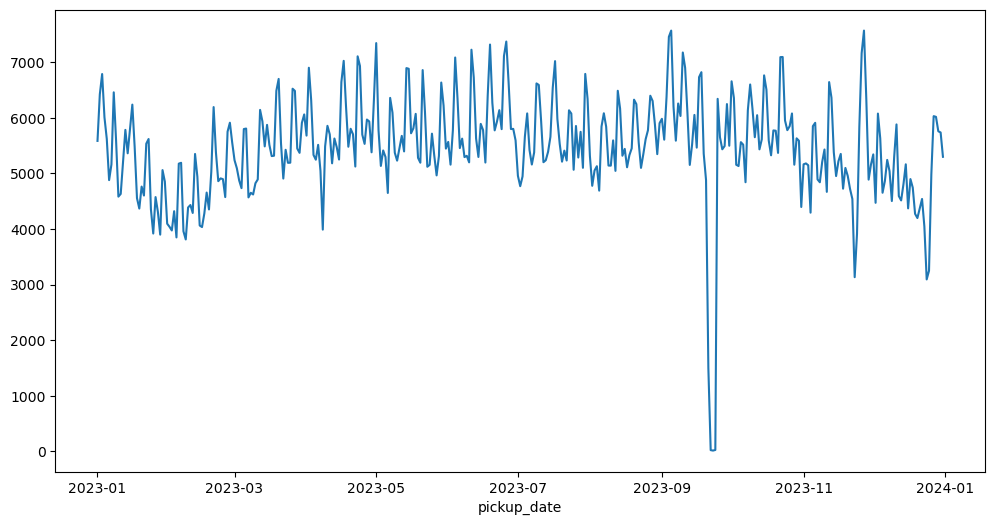

In [17]:
# Daily time series
df_jfk_2023['pickup_date'] = df_jfk_2023['tpep_pickup_datetime'].dt.date

# Trips per day
daily_counts_jfk_2023 = df_jfk_2023.groupby('pickup_date').size()

# Plot
daily_counts_jfk_2023.plot(figsize = (12,6))

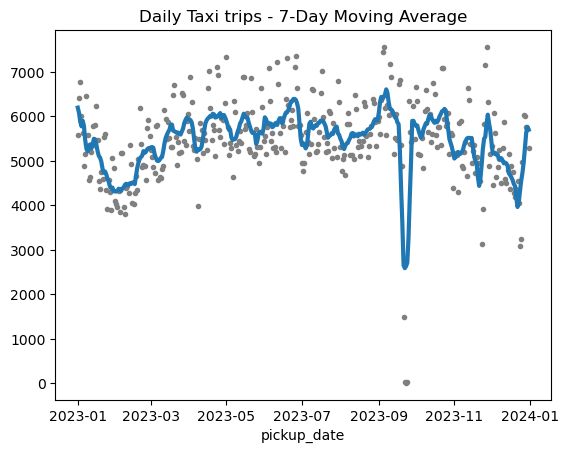

In [18]:
# Create rolling average
moving_average = daily_counts_jfk_2023.rolling(
    window = 7,
    center = True,
    min_periods = 3,
).mean()

ax = daily_counts_jfk_2023.plot(style = ".", color = "0.5")
moving_average.plot(
    ax = ax, linewidth = 3, title = "Daily Taxi trips - 7-Day Moving Average", legend = False,
);

One of the interesting things is that in the plots for both NYC and JFK airport there are several data points between Nov and Oct with incredibly low daily taxis. These clearly have a signficiant affect on the rolling average and so we investigate to see if they are signs of data collection error and should be removed from the data set.

In [23]:
mask = daily_counts_jfk_2023 < 1000
subset = daily_counts_jfk_2023[mask]

subset

pickup_date
2023-09-22    23
2023-09-23    15
2023-09-24    26
dtype: int64

In [24]:
daily_counts_jfk_2023.mean()

np.float64(5458.290410958904)

These are incredibly low values of taxis for JFK airport considering the mean number for the year is about 5458. This suggests some kind of data corruption, to fix this we will remove and interpolate linearly.

In [29]:
# First we need to ensure that the daily counts index is a pandas datetime and not an object
daily_counts_jfk_2023.index = pd.to_datetime(daily_counts_jfk_2023.index)


In [31]:
# Set to NA
daily_counts_jfk_2023.loc["2023-09-22":"2023-09-24"] = pd.NA

# Interpolate
daily_counts_jfk_2023 = daily_counts_jfk_2023.interpolate(method = "linear")

# Check
daily_counts_jfk_2023.loc["2023-09-22":"2023-09-24"]



pickup_date
2023-09-22    2708.75
2023-09-23    3918.50
2023-09-24    5128.25
dtype: float64

In [34]:
mask = daily_counts_jfk_2023 < 4000
subset = daily_counts_jfk_2023[mask]

subset

pickup_date
2023-01-25    3917.00
2023-01-28    3897.00
2023-02-02    3972.00
2023-02-04    3847.00
2023-02-07    3958.00
2023-02-08    3810.00
2023-04-08    3987.00
2023-09-21    1499.00
2023-09-22    2708.75
2023-09-23    3918.50
2023-11-23    3132.00
2023-11-24    3913.00
2023-12-24    3092.00
2023-12-25    3248.00
dtype: float64

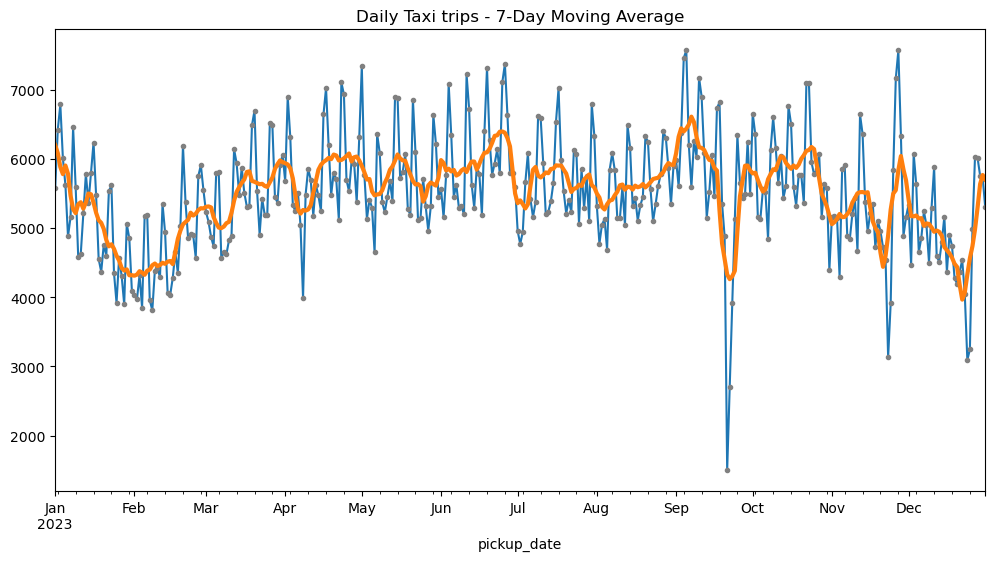

In [32]:
# Re-do plots

# Plot
daily_counts_jfk_2023.plot(figsize = (12,6))

# Create rolling average
moving_average = daily_counts_jfk_2023.rolling(
    window = 7,
    center = True,
    min_periods = 3,
).mean()

ax = daily_counts_jfk_2023.plot(style = ".", color = "0.5")
moving_average.plot(
    ax = ax, linewidth = 3, title = "Daily Taxi trips - 7-Day Moving Average", legend = False,
);

In [119]:
# Save the daily_counts_jfk_2023 as a csv
daily_counts_jfk_2023.to_csv("../data/interim/ts_2023.csv")

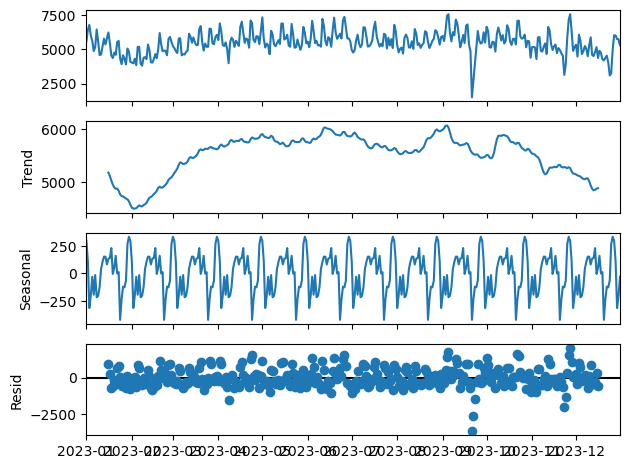

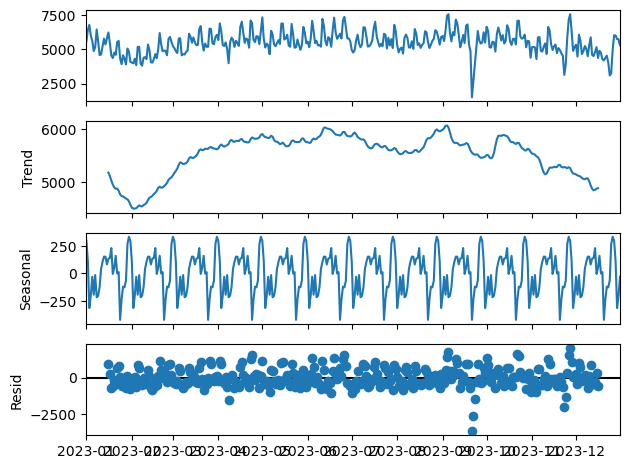

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Monthly seasonality
result = seasonal_decompose(daily_counts_jfk_2023, model = "additive", period = 30)
result.plot()

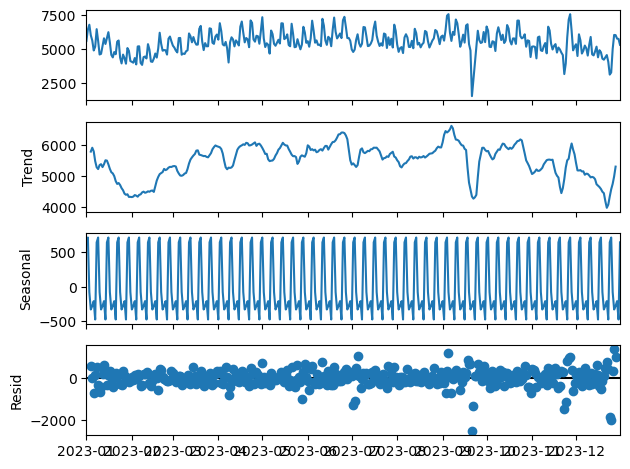

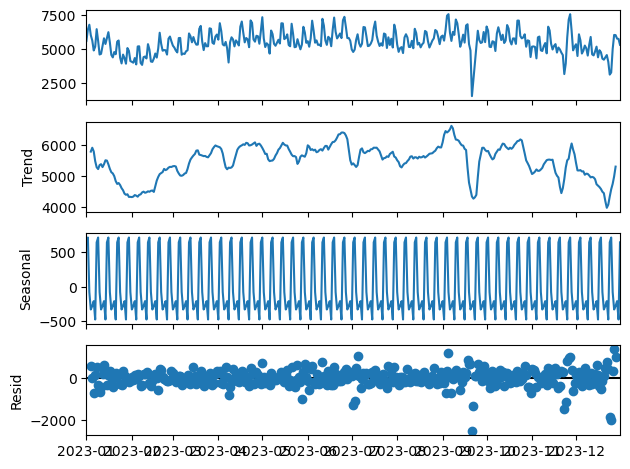

In [36]:
# Weekly seasonality
result = seasonal_decompose(daily_counts_jfk_2023, model = "additive", period = 7)
result.plot()

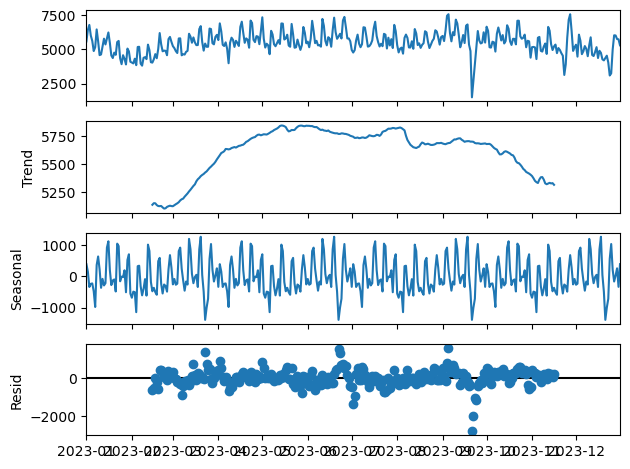

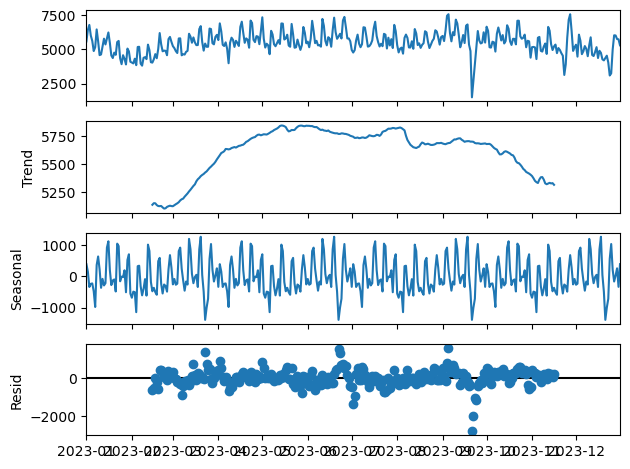

In [37]:
# Quartly seasonality
result = seasonal_decompose(daily_counts_jfk_2023, model = "additive", period = 91)
result.plot()

In [38]:
# Create data frame with lags
y = daily_counts_jfk_2023
X = pd.DataFrame({
    "y": y,
    "lag_1": y.shift(1),
    "lag_7": y.shift(7),
    "lag_30": y.shift(30),
    "roll_7": y.shift(1).rolling(7).mean(),
    "roll_30": y.shift(1).rolling(30).mean()
}).dropna()

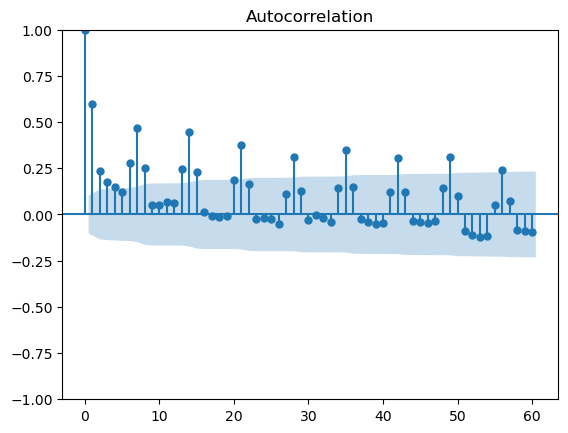

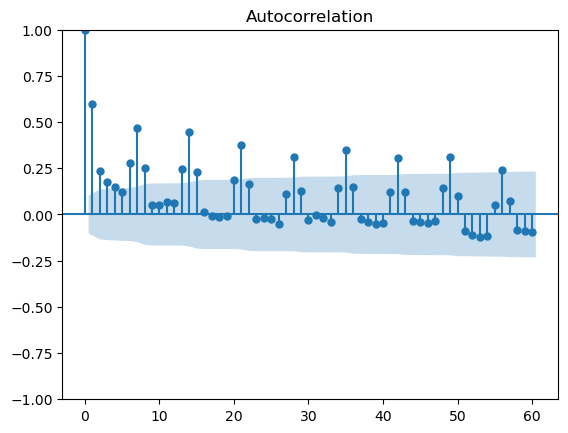

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags = 60, alpha = 0.05)

In [43]:
from statsmodels.tsa.stattools import acf

# Compute autocorrelations
acf_vals, confint = acf(y, nlags = 60, alpha = 0.05)

In [45]:
# To find significant lags we look for lags where 0 lies outside the 95% confidence interval
significant_lags = []
for lag, (val, (low, high)) in enumerate(zip(acf_vals, confint)):
    if lag == 0:
        continue
    if 0 < low or 0 > high:
        significant_lags.append((lag, val))
print("Significant lags:", significant_lags)

# So sig lags are: 1, 2, 3, 4, 6, 7, 8, 13, 14, 15, 20, 21, 28, 35, 42, 49, 56

Significant lags: [(1, np.float64(0.597927315539281)), (2, np.float64(0.23477127576557147)), (3, np.float64(0.1755178487178286)), (4, np.float64(0.14986079675024772)), (6, np.float64(0.279184566682371)), (7, np.float64(0.4667144199110946)), (8, np.float64(0.2511918578747503)), (13, np.float64(0.2457309611816613)), (14, np.float64(0.44560775557611415)), (15, np.float64(0.22871205618898613)), (20, np.float64(0.18917171252785014)), (21, np.float64(0.3772857050563672)), (28, np.float64(0.3084297138292898)), (35, np.float64(0.34742839294987893)), (42, np.float64(0.30518891511054774)), (49, np.float64(0.3115813990818088)), (56, np.float64(0.2387390819391244))]


Based on the above we decided to create the following model.

If y is the number of daily pickups from JFK then we say that:

y = trend + seasonality + residuals

We are going to model the trend as being a roughly a cubic polynomial in time from the 7 day rolling average. 

We will use fourier features to capture what appears to be weekly seasonality.

Both of these will be fit under a linear regression model, we will then use XGBoost to fit the residuals using the lags as well as daily flight data.

In [104]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = daily_counts_jfk_2023

dp = DeterministicProcess(
    index = y.index,
    constant = True,   # Dummy feature for bias (y-intercept)
    order = 1,         # Polynomial trend (degree 1 = linear)
    seasonal = True,    # Adds seasonal dummies
    period = 7,        # Weekly seasonality (7-day cycle)
    drop = True,       # Drop first column to avoid collinearity
)

X = dp.in_sample()


In [105]:
# We now add in the lag features.
# The reason we haven't used all the significant lags is we will need to drop the rows that
# contain null values and if we use lag say 49 we will be dropping about 15% of our data

for i in [1, 2, 3, 4, 6, 7, 8, 13, 14, 15]:
    X[f'y_lag_{i}'] = y.shift(i)

# Drop all na rows
mask = X.notna().all(axis=1) # keep only rows with no NaNs
X = X.loc[mask]
y = y.loc[mask]

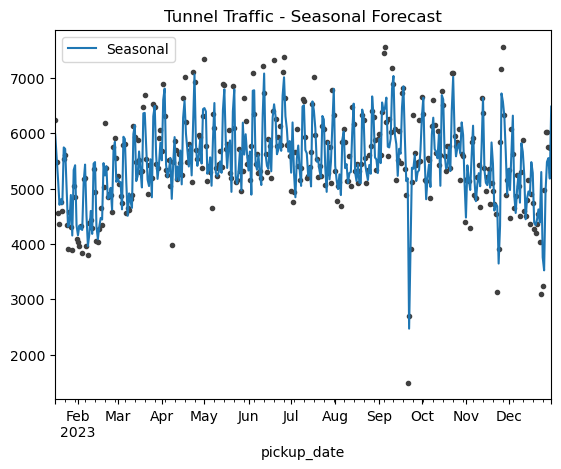

In [106]:
from sklearn.linear_model import LinearRegression


model = LinearRegression(fit_intercept = False)
_ = model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=y.index)

ax = y.plot(color='0.25', style='.', title="Daily taxis - 2023")
ax = y_pred.plot(ax=ax, label="Seasonal")

__ = ax.legend()

In [107]:
# We now train XGBoost on the residuals
from xgboost import XGBRegressor
# Create resiudals:
y_resid = y - y_pred

# Train XGBoost on the residuals
xgb = XGBRegressor()
xgb.fit(X, y_resid)

# Add the predicted residuals onto the predicted trends
y_pred_boosted = xgb.predict(X) + y_pred

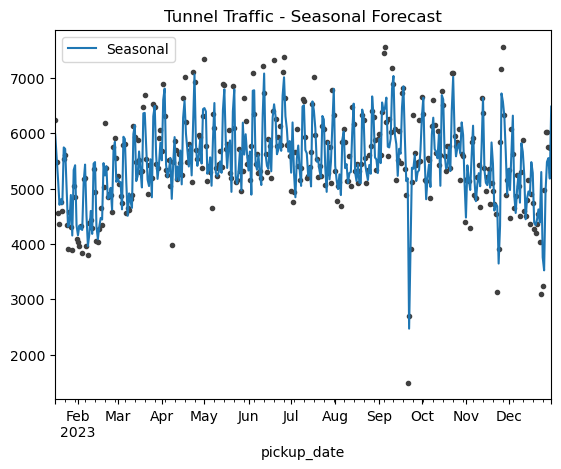

In [108]:
ax = y.plot(color='0.25', style='.', title="Daily Taxis - 2023")
ax = y_pred.plot(ax=ax, label="Seasonal")

__ = ax.legend()

In [109]:
# To test the accuracy of this model we will use expanding window cross validation.
# The idea being that we train the data on an ever expanding window and test on the
# new unseen chunk.

# We will also compare against 3 Naive baselines:
# Today = yesterday
# Today = same weekday last week
# Today = average of last 7 days



from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def ts_cv(X,y):
    tscv = TimeSeriesSplit(n_splits = 5)
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        X_train, X_test = X.iloc[train_idx].to_numpy(), X.iloc[test_idx].to_numpy()
        y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_fit = model.predict(X_train)
        
        # Train XGBoost on residuals
        y_resid = y_train - y_fit
    
        xgb = XGBRegressor()
        xgb.fit(X_train, y_resid)
    
        # Add the predicted residuals onto the predicted trends
        y_fit_boosted = xgb.predict(X_train) + y_fit
        y_pred_boosted = xgb.predict(X_test) + y_pred
        
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Fold {fold+1}: MAE = {mae:.4f}")
    
        mae_boost = mean_absolute_error(y_test, y_pred_boosted)
        print(f"Fold {fold+1} Boosted MAE: MAE = {mae_boost:.2f}")
    
        # Now the simple baselines:
    
        # Today = yesterday
        y_pred_naive = y.shift(1).iloc[test_idx]
        mae_naive = mean_absolute_error(y_test, y_pred_naive)
        print(f"Fold {fold+1} Naive MAE: MAE = {mae_naive:.2f}")
    
        # Today = same weekday last week
        y_pred_seasonal = y.shift(7).iloc[test_idx]
        mae_seasonal = mean_absolute_error(y_test, y_pred_seasonal)
        print(f"Fold {fold+1} Seasonal MAE: MAE = {mae_seasonal:.2f}")
       
        # Rolling mean baseline
        y_pred_roll7 = y.shift(1).rolling(7).mean().iloc[test_idx]
        mae_roll_mean = mean_absolute_error(y_test, y_pred_roll7)
        print(f"Fold {fold+1} Roll mean MAE: MAE = {mae_roll_mean:.2f}")
    
        # XGBoost on all features
        xgb.fit(X_train, y_train)
    
        y_pred_xgb = xgb.predict(X_test)
        mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
        print(f"Fold {fold+1} XGB MAE: MAE = {mae_xgb:.2f}")
        print("\n")

        # Residual plots:

        # Plot against fitted values
        #plt.figure(figsize = (12, 6))
        #plt.scatter(y_fit, y_resid, alpha = 0.5)
        #plt.axhline(0, color = "red", linestyle = "--", linewidth = 1) 
        #plt.title("Residuals vs fitted values")
        #plt.xlabel("Fitted values")
        #plt.ylabel("Residual")
        #plt.legend()
        #plt.show()
ts_cv(X,y)

Fold 1: MAE = 348.1582
Fold 1 Boosted MAE: MAE = 416.10
Fold 1 Naive MAE: MAE = 575.71
Fold 1 Seasonal MAE: MAE = 448.29
Fold 1 Roll mean MAE: MAE = 516.99
Fold 1 XGB MAE: MAE = 874.60


Fold 2: MAE = 399.5511
Fold 2 Boosted MAE: MAE = 371.43
Fold 2 Naive MAE: MAE = 581.60
Fold 2 Seasonal MAE: MAE = 582.69
Fold 2 Roll mean MAE: MAE = 576.56
Fold 2 XGB MAE: MAE = 477.74


Fold 3: MAE = 367.3779
Fold 3 Boosted MAE: MAE = 365.67
Fold 3 Naive MAE: MAE = 514.41
Fold 3 Seasonal MAE: MAE = 383.43
Fold 3 Roll mean MAE: MAE = 473.71
Fold 3 XGB MAE: MAE = 341.43


Fold 4: MAE = 375.7023
Fold 4 Boosted MAE: MAE = 449.18
Fold 4 Naive MAE: MAE = 656.55
Fold 4 Seasonal MAE: MAE = 812.71
Fold 4 Roll mean MAE: MAE = 711.19
Fold 4 XGB MAE: MAE = 519.55


Fold 5: MAE = 501.1284
Fold 5 Boosted MAE: MAE = 551.72
Fold 5 Naive MAE: MAE = 613.21
Fold 5 Seasonal MAE: MAE = 834.90
Fold 5 Roll mean MAE: MAE = 683.74
Fold 5 XGB MAE: MAE = 621.19




It is worth investigating why the 4th and 5th folds seem to be increasing the MAE. From the previous rolling average plot it is clear that there is an unusal dip in taxis late September.

We also observe that the linear regression on its own without XGBoosted residuals outperforms all other models. And that the best baseline is the Naive Today = Yesterday baseline.

Fold 1: MAE = 348.1582
Fold 1 Naive MAE: MAE = 575.71


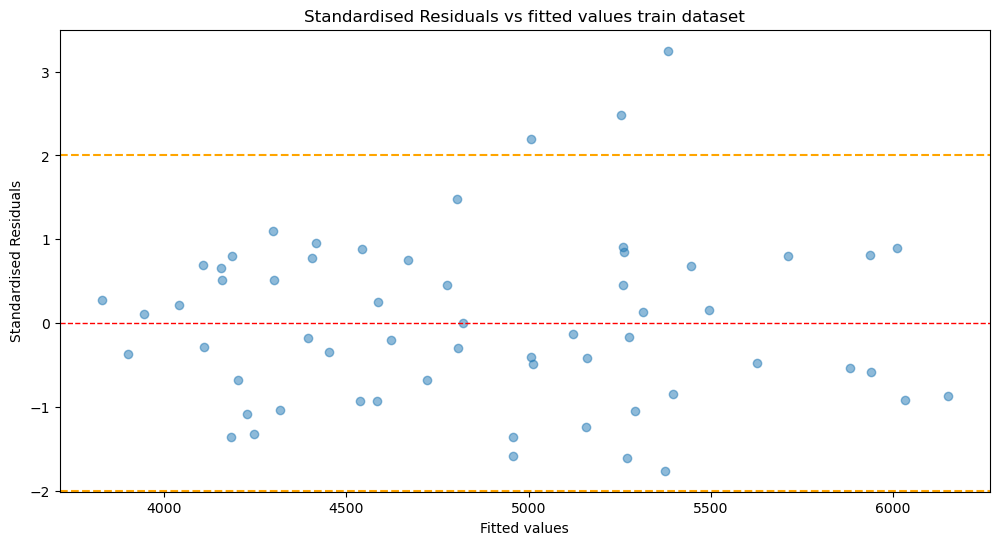

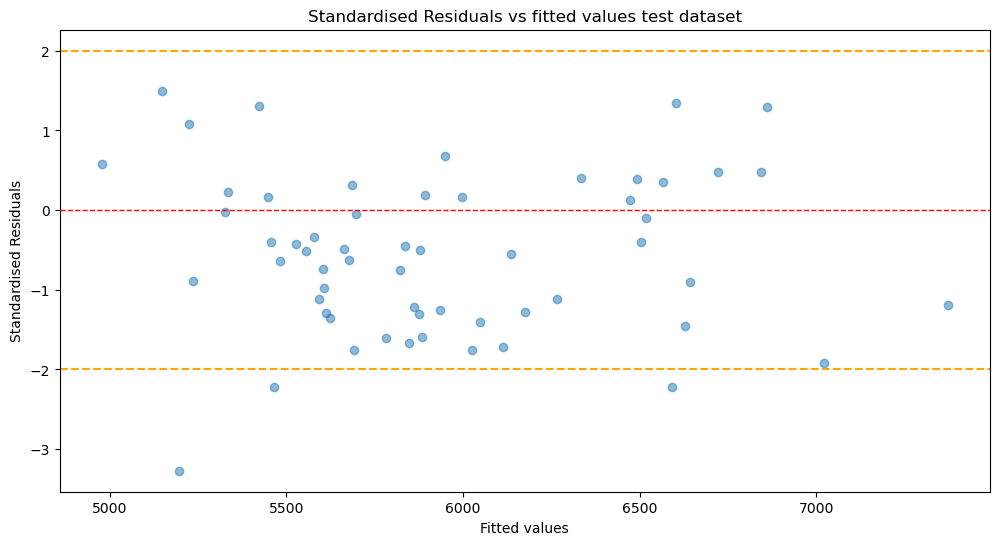

Fold 2: MAE = 399.5511
Fold 2 Naive MAE: MAE = 581.60


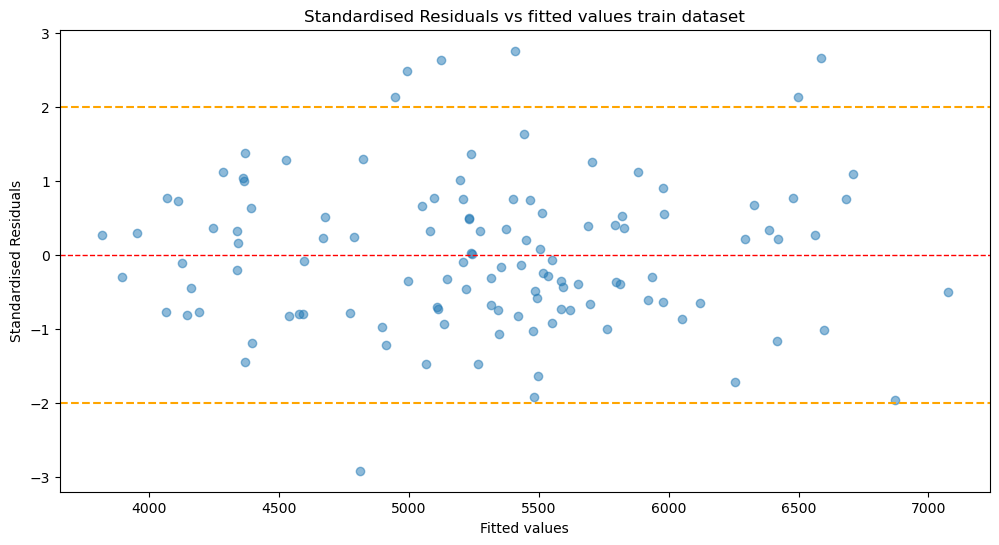

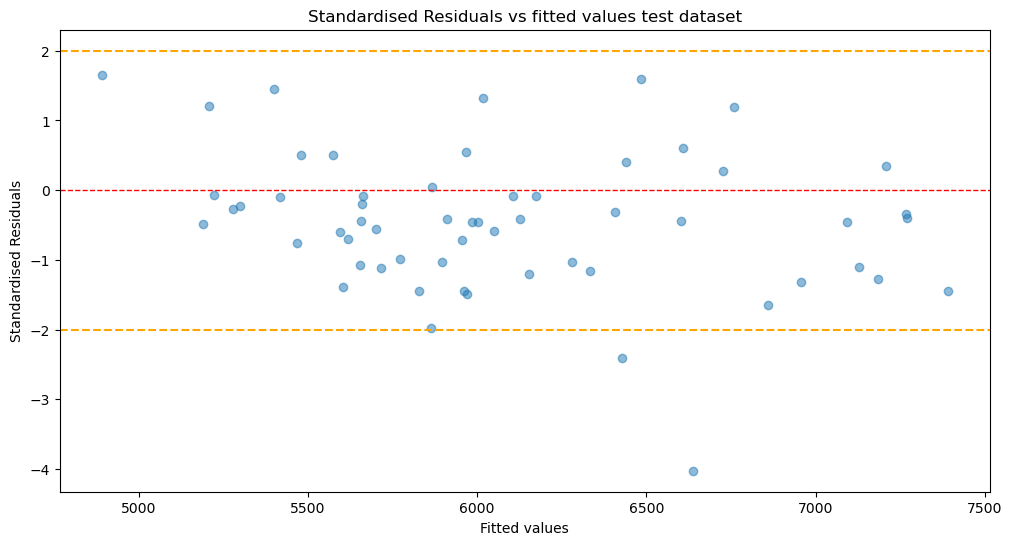

Fold 3: MAE = 367.3779
Fold 3 Naive MAE: MAE = 514.41


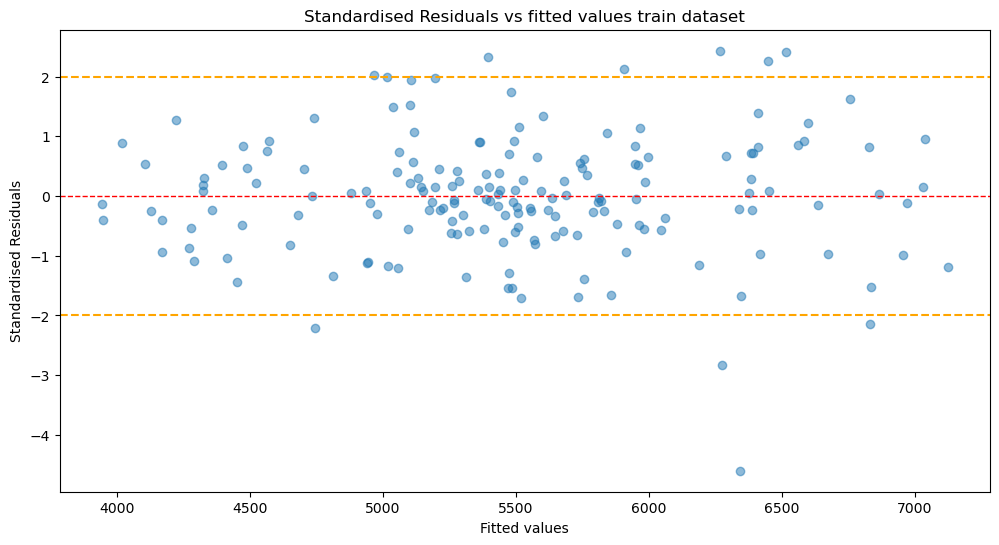

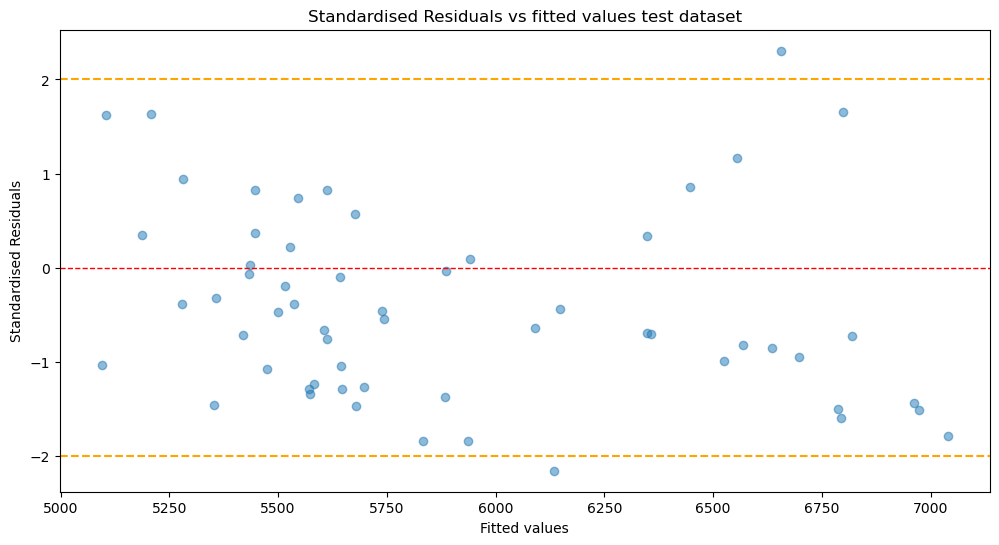

Fold 4: MAE = 375.7023
Fold 4 Naive MAE: MAE = 656.55


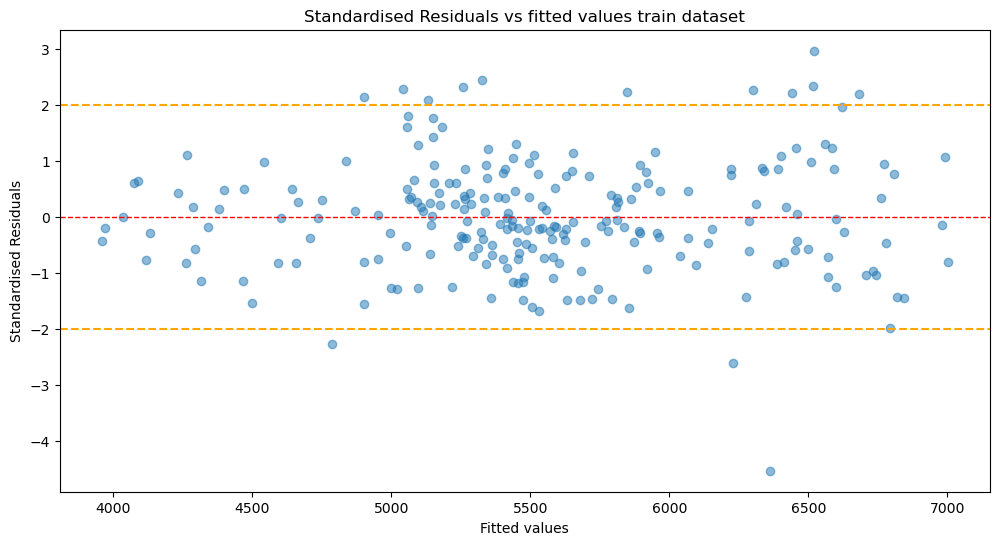

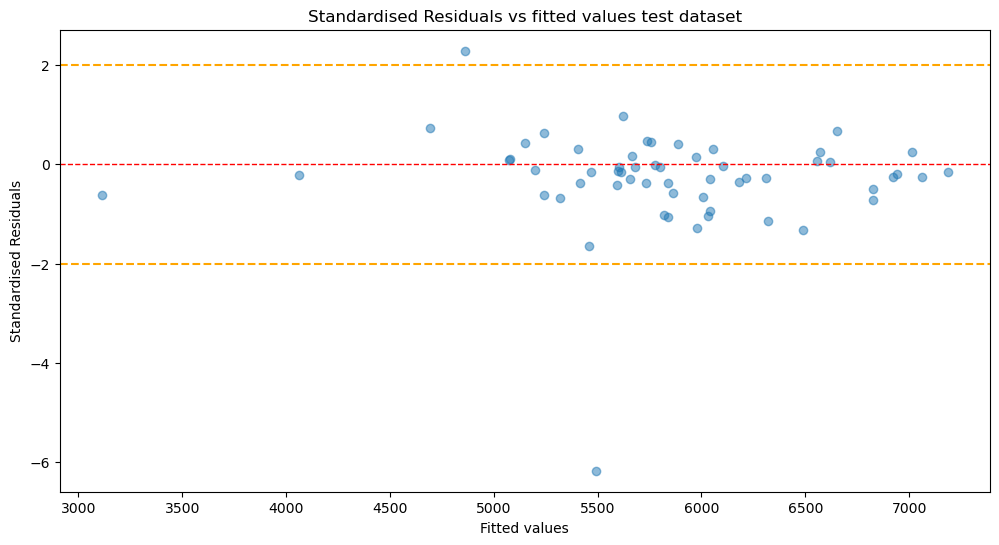

Fold 5: MAE = 501.1284
Fold 5 Naive MAE: MAE = 613.21


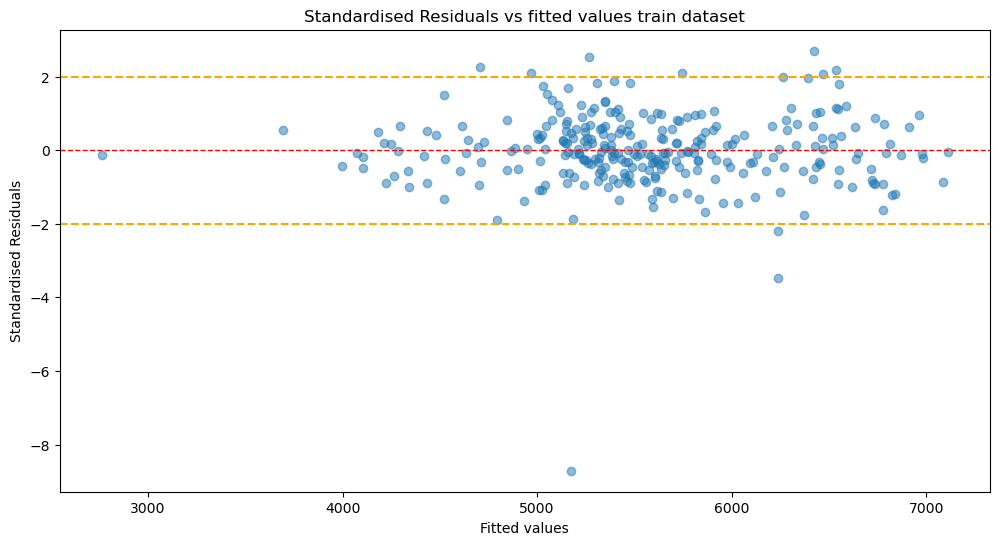

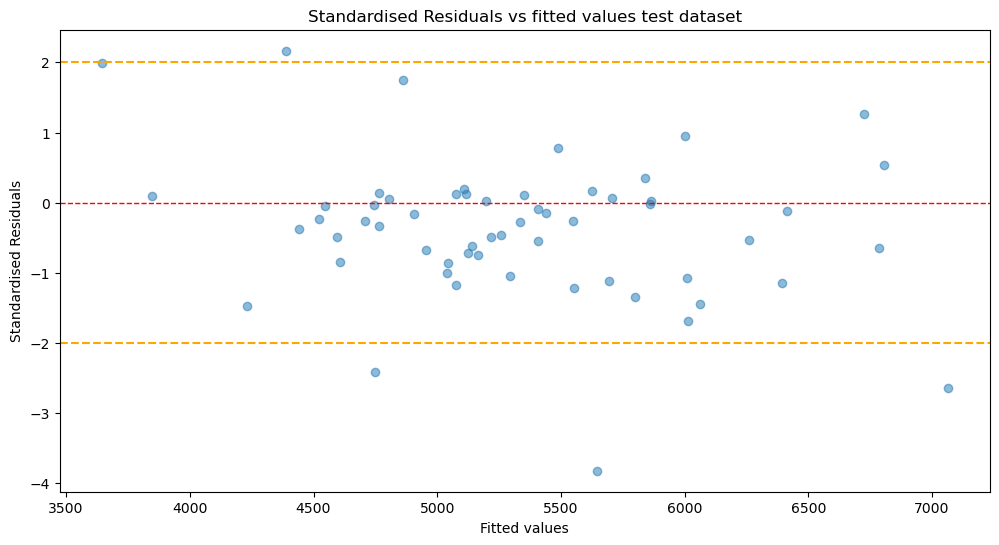

In [116]:
# We modify the ts_cv function below, we now use the statsmodels version of 
import numpy as np

def ts_cv_2(X,y):
    tscv = TimeSeriesSplit(n_splits = 5)
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        X_train, X_test = X.iloc[train_idx].to_numpy(), X.iloc[test_idx].to_numpy()
        y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_fit = model.predict(X_train) 
   
       
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Fold {fold+1}: MAE = {mae:.4f}")
    
   
        # Now the simple baseline:
    
        # Today = yesterday
        y_pred_naive = y.shift(1).iloc[test_idx]
        mae_naive = mean_absolute_error(y_test, y_pred_naive)
        print(f"Fold {fold+1} Naive MAE: MAE = {mae_naive:.2f}")
    
        # Residual plots:

        # Standardised residuals
        residuals_train = y_train - y_fit
        std_resid_train = residuals_train / np.std(residuals_train)

        residuals_test = y_test - y_pred
        std_resid_test = residuals_test / np.std(residuals_test)

        # Plot against fitted values
        plt.figure(figsize = (12, 6))
        plt.scatter(y_fit, std_resid_train, alpha = 0.5)
        plt.axhline(0, color = "red", linestyle = "--", linewidth = 1) 
        plt.axhline(2, color = "orange", linestyle = "--")
        plt.axhline(-2, color = "orange", linestyle = "--")
        plt.title("Standardised Residuals vs fitted values train dataset")
        plt.xlabel("Fitted values")
        plt.ylabel("Standardised Residuals")
        plt.show()

        plt.figure(figsize = (12, 6))
        plt.scatter(y_pred, std_resid_test, alpha = 0.5)
        plt.axhline(0, color = "red", linestyle = "--", linewidth = 1) 
        plt.axhline(2, color = "orange", linestyle = "--")
        plt.axhline(-2, color = "orange", linestyle = "--")
        plt.title("Standardised Residuals vs fitted values test dataset")
        plt.xlabel("Fitted values")
        plt.ylabel("Standardised Residuals")
        plt.show()
ts_cv_2(X,y)

In [120]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = daily_counts_jfk_2023

dp = DeterministicProcess(
    index = y.index,
    constant = True,   # Dummy feature for bias (y-intercept)
    order = 1,         # Polynomial trend (degree 1 = linear)
    seasonal = True,    # Adds seasonal dummies
    period = 7,        # Weekly seasonality (7-day cycle)
    drop = True,       # Drop first column to avoid collinearity
)

X = dp.in_sample()


In [121]:
# We now add in the lag features.
# The reason we haven't used all the significant lags is we will need to drop the rows that
# contain null values and if we use lag say 49 we will be dropping about 15% of our data

for i in [1, 2, 3, 4, 6, 7, 8, 13, 14, 15]:
    X[f'y_lag_{i}'] = y.shift(i)

# Drop all na rows
mask = X.notna().all(axis=1) # keep only rows with no NaNs
X = X.loc[mask]
y = y.loc[mask]

Fold 1: MAE = 348.1582
Fold 1 Naive MAE: MAE = 575.71


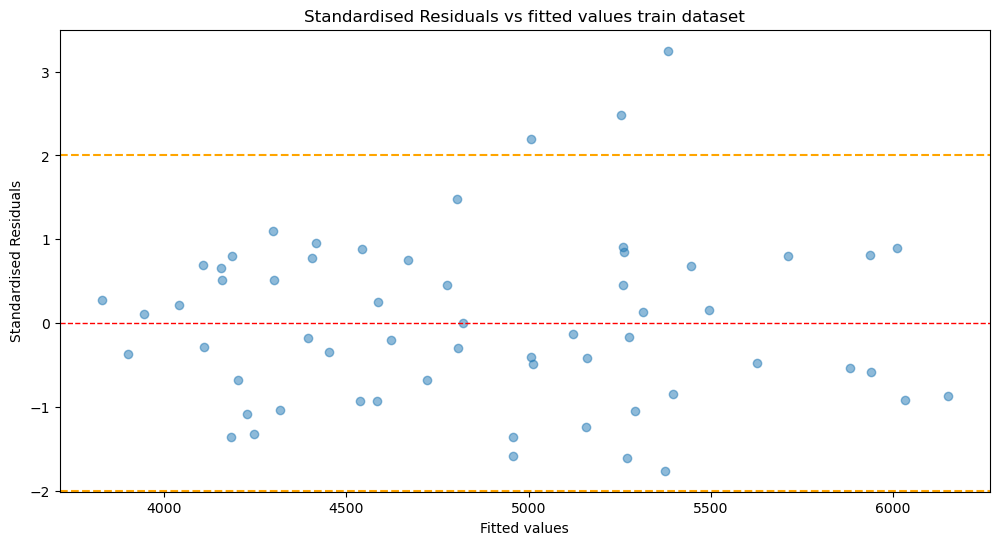

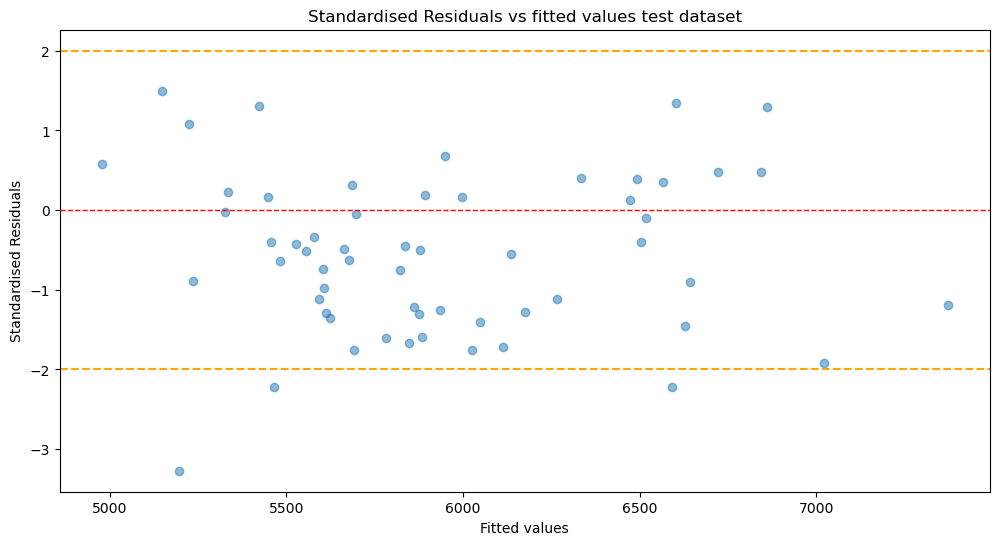

Fold 2: MAE = 399.5511
Fold 2 Naive MAE: MAE = 581.60


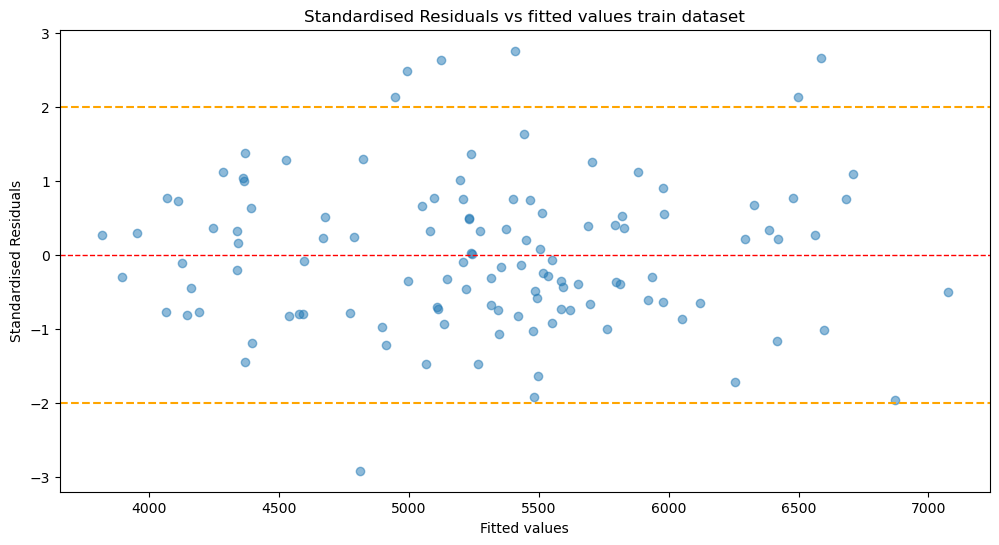

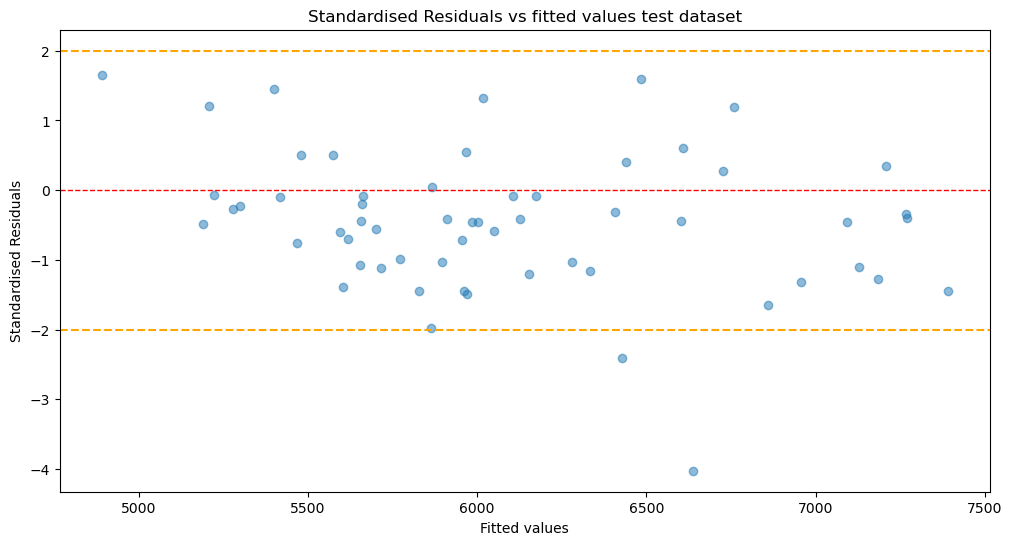

Fold 3: MAE = 367.3779
Fold 3 Naive MAE: MAE = 514.41


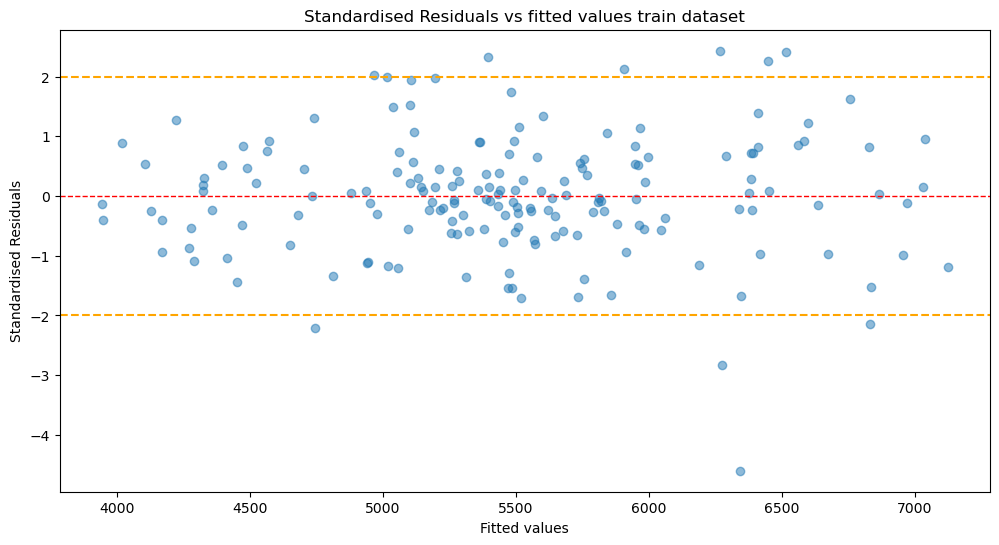

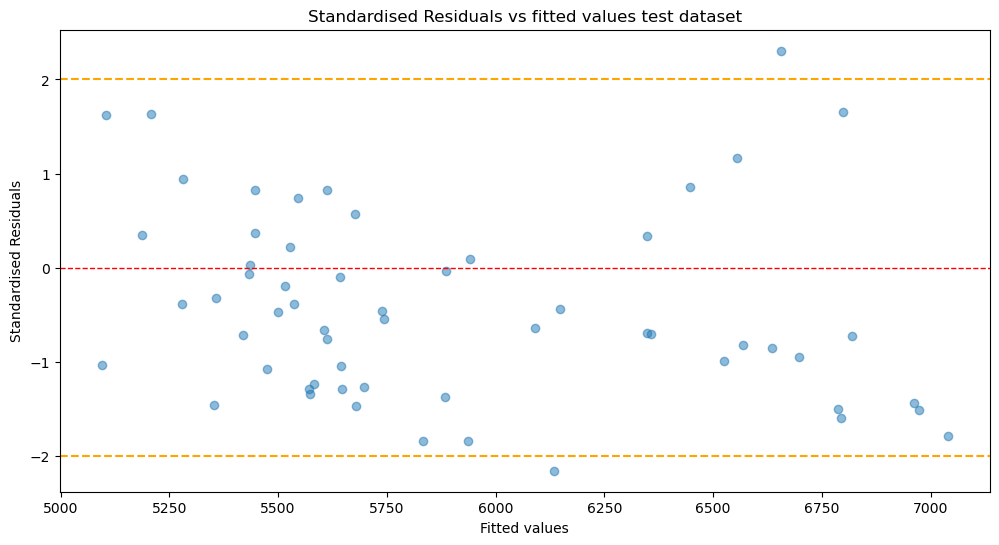

Fold 4: MAE = 375.7023
Fold 4 Naive MAE: MAE = 656.55


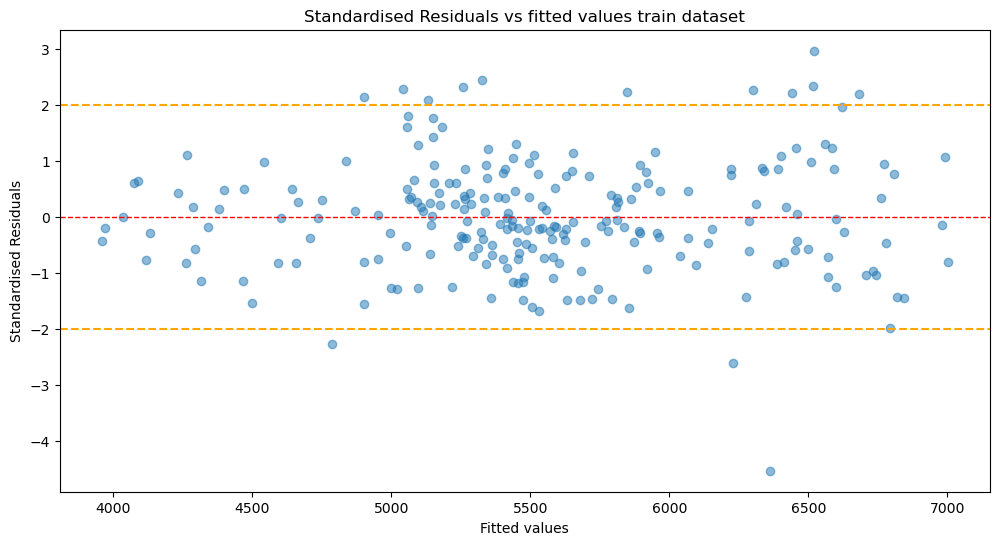

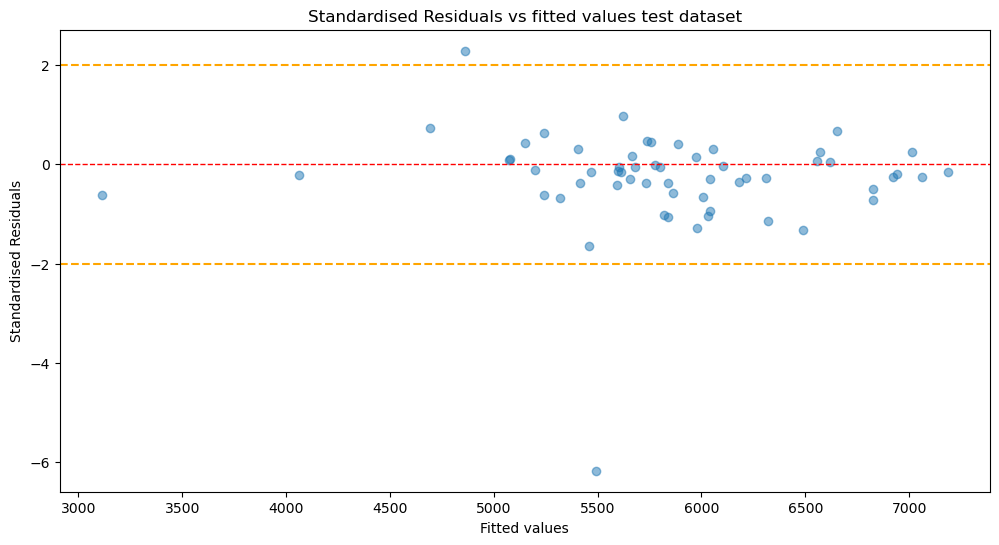

Fold 5: MAE = 501.1284
Fold 5 Naive MAE: MAE = 613.21


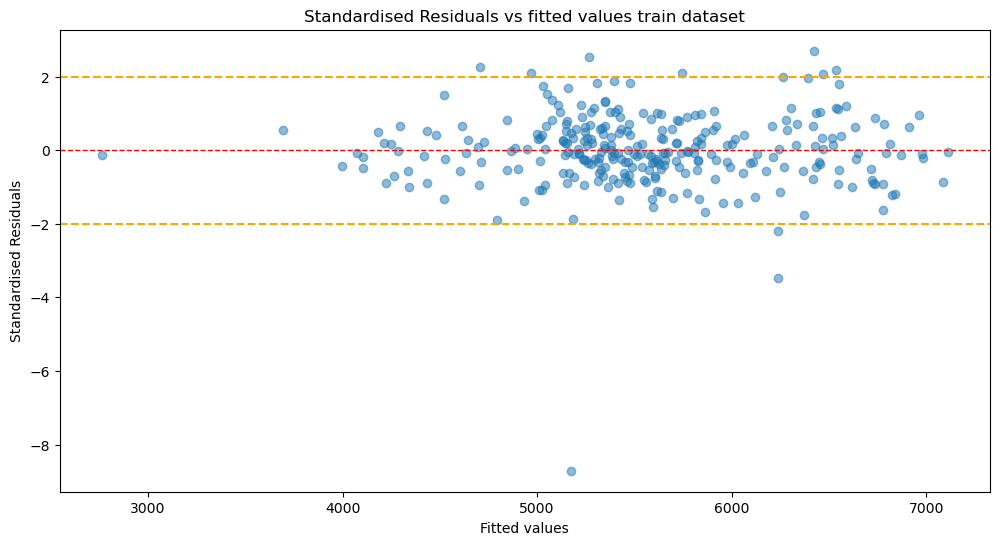

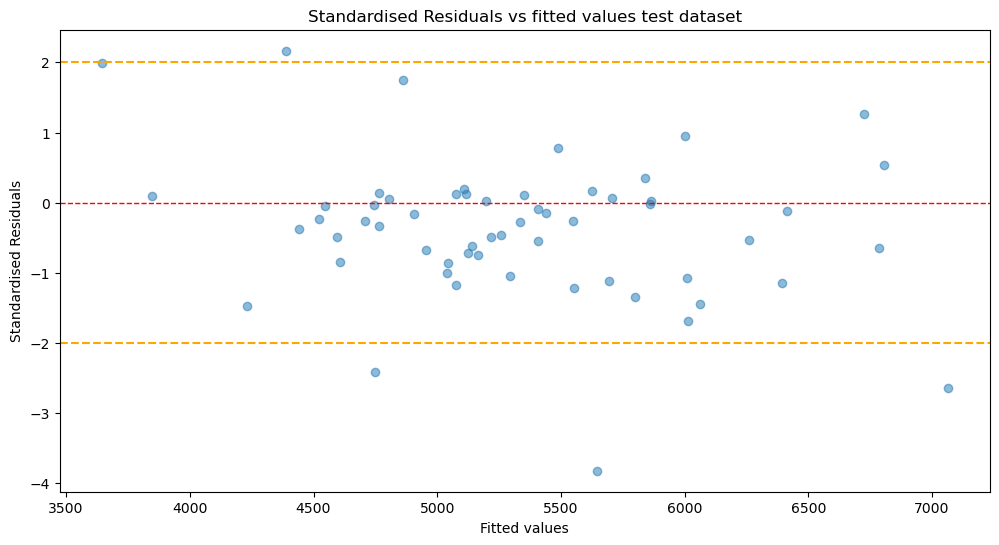

In [122]:
ts_cv_2(X,y)